Pour cette quête, tu vas utiliser Dbeaver.  
C'est un logiciel très simple à télécharger et installer.
Tu y importeras la base de données movies.sqlite.  
Une fois que c'est fait, tu pourras faire des requêtes pour répondre aux questions suivantes.  
Quelques questions pour t'échauffer, puis ça devient plus compliqué. Tu vas passer au niveau supérieur, accroche toi !!!

1. 🤔 Le top 3 des films les plus populaires

In [ ]:
#  Le top 3 des films les plus populaires
 SELECT m.original_title, m.popularity
 FROM movies as m
 ORDER BY m.popularity DESC
 LIMIT 3;

In [ ]:
# #IMPORT D IMAGE OU DE FICHIER DEPUIS PC VERS COLAB
# # VERSION MATLPLOTLIB
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Lire l'image
# path_image=r"G:\programmation\WildCodeSchool\Formation_IA_DATA_nov2023\quêtes\Semaine3\quetes_sql\quete_movies_sql\2_screenshot1.png"
# img = mpimg.imread(path_image)

# # Afficher l'image
# plt.imshow(img)
# plt.show()

In [ ]:
#IMPORT D IMAGE OU DE FICHIER DEPUIS PC VERS COLAB
# VERSION PYTHON
# from google.colab  import files
# from PIL import Image

# # Ouvrir l'image
# uploaded_image=files.upload()
# path_image="G:\programmation\WildCodeSchool\Formation_IA_DATA_nov2023\quêtes\Semaine3\quetes_sql\quete_movies_sql\2_screenshot1.png"
# img = Image.open(path_image)

# # Afficher l'image
# img.show()

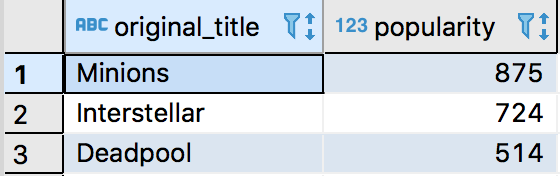

2. 🤔 Le nombre de films par réalisateur

In [ ]:
#Le nombre de films par réalisateur
SELECT d.name, COUNT(m.director_id) as nombre_de_films
FROM directors d
JOIN movies m ON d.id = m.director_id
GROUP BY d.name
ORDER BY nombre_de_films DESC;

# autre solution avec une vue producteur_movies:
# creation de la vue
CREATE VIEW producteur_movies AS
SELECT d.name as name, m.title as movie_title
FROM directors d
JOIN movies m ON d.id = m.director_id;

# requete utilisant la vue
SELECT pm.name, COUNT(pm.movie_title) as nombre_de_films
FROM producteur_movies pm
GROUP BY name
ORDER BY nombre_de_films DESC;

In [ ]:
# from IPython.display import Image
# Image(".\quete_movies_sql\\screenshot1.png")

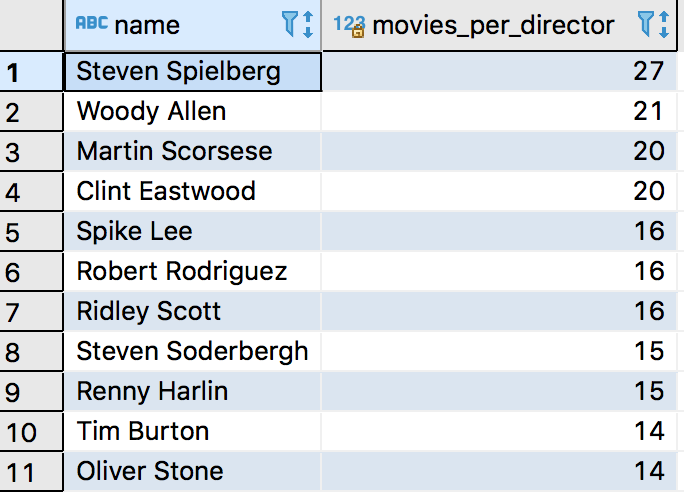

3. 🤔 Le top 5 des réalisateurs ayant réalisé des bénéfices au cours de leur carrière.

In [ ]:
# --Le top 5 des réalisateurs ayant réalisé des bénéfices au cours de leur carrière.
SELECT d.name, SUM(m.revenue) as profits
FROM directors d
JOIN movies m ON d.id = m.director_id
GROUP BY d.name
ORDER BY profits DESC
LIMIT 5;


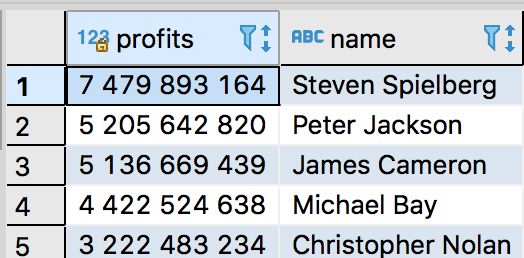

4. 🤔 Le nombre de films par réalisateur dont la popularité est inférieure à 10.Puis, la moyenne des notes de ces films.

In [ ]:
# --Le nombre de films par réalisateur dont la popularité est
# inférieure à 10.Puis, la moyenne des notes de ces films.
SELECT
d.name as directors_name,
COUNT(m.popularity) as ranking ,
AVG(m.vote_average) as Average_note
FROM directors d
JOIN movies m ON d.id = m.director_id
WHERE m.popularity <10
GROUP BY d.name
ORDER BY ranking DESC;

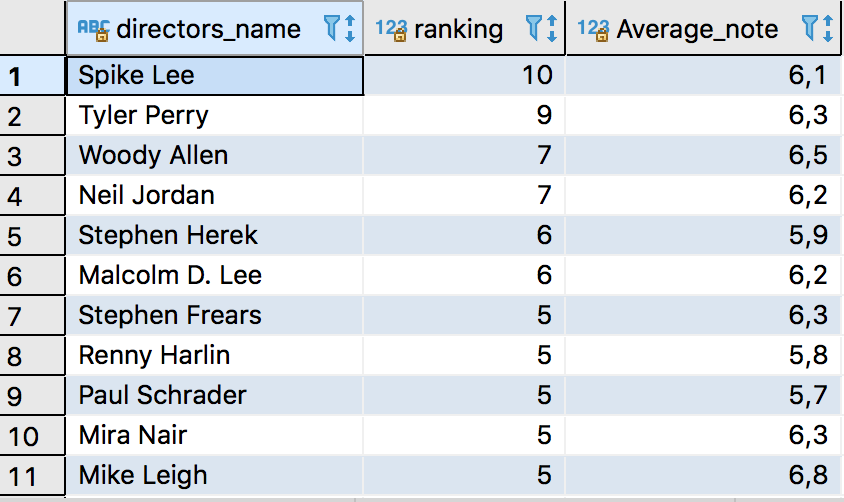

# VIEW

5. 🤔 Tu vas maintenant créer une `VIEW` qui contient les réalisatrices, chacun de leur film ainsi que le nombre de votant par film.  
Enfin, à partir de cette vue, on veut le classement des réalisatrices en fonction du nombre de films, pour les films ayant plus de 1000 votants.

In [ ]:
# --Tu vas maintenant créer une VIEW qui contient les réalisatrices,
# --chacun de leur film ainsi que le nombre de votant par film.
# --Enfin, à partir de cette vue, on veut le classement des réalisatrices
# --en fonction du nombre de films, pour les films ayant plus de 1000 votants.

# --création de la vue

CREATE VIEW woman_directors_with_votes AS
SELECT d.name, m.original_title, m.vote_count
FROM movies m
JOIN directors d ON d.id = m.director_id
WHERE d.gender =1;

# --création de la requete

SELECT
name as productrice_name,
COUNT(original_title) as number_of_movies
FROM woman_directors_with_votes
WHERE vote_count  > 1000
GROUP BY name
ORDER BY number_of_movies DESC;

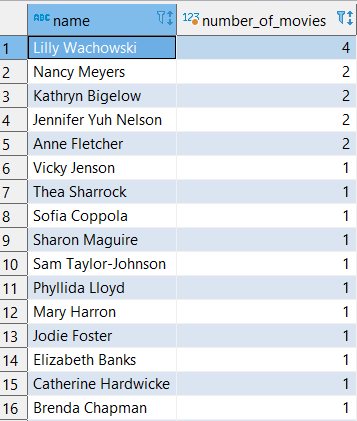

# Window Function

6. 🤔 Pour chaque réalisateur, Le top 3 des films dont la note moyenne est supérieure à 8 et réalisé après 2000, en fonction de la note moyenne.

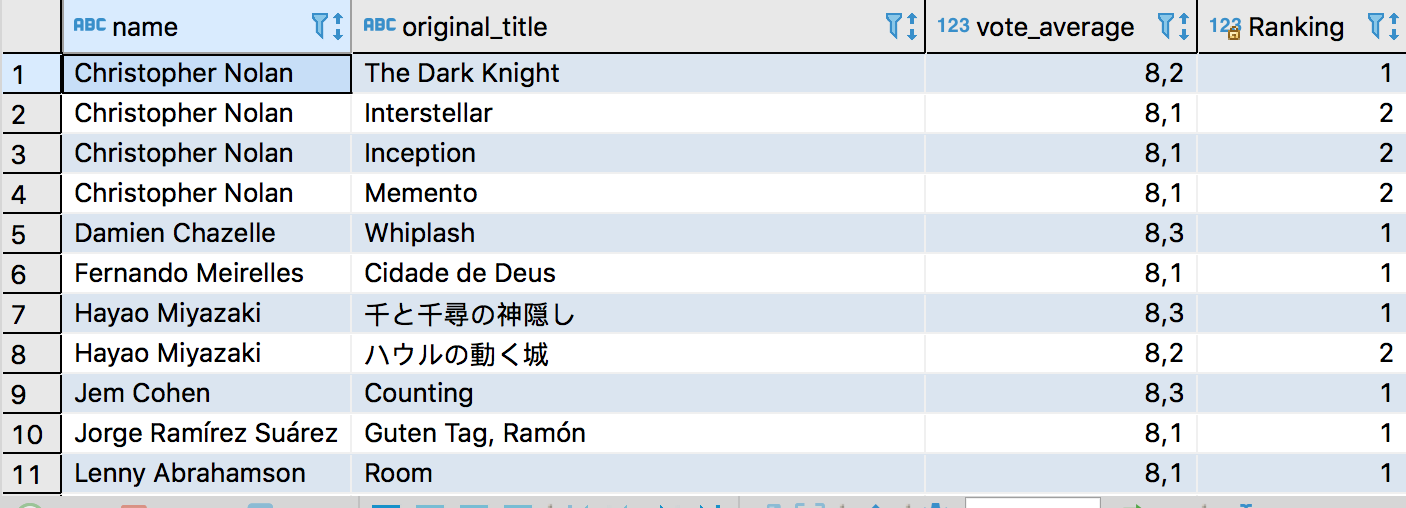

In [ ]:
#6 --Pour chaque réalisateur, Le top 3 des films dont la note moyenne est supérieure à 8 et réalisé après 2000, en fonction de la note moyenne.

# --requete
WITH
ranked_movies AS (
    SELECT
        d.name AS realisateur,
        m.title AS titre,
        m.vote_average AS note_moyenne,
    # --création colonne ranking qui attribue un rang à chaque film pour chaque
    # réalisateur en fonction de la moyenne du film
    # Les films avec des notes moyennes plus élevées reçoivent des rangs plus bas
        ROW_NUMBER() OVER(PARTITION BY d.name ORDER BY m.vote_average DESC) as ranking
    FROM
        directors d
    JOIN
        movies m ON d.id = m.director_id
    WHERE
        m.vote_average > 8 AND m.release_date > '2000-01-01'
)
SELECT
    realisateur,
    titre,
    note_moyenne,
    ranking
FROM
    ranked_movies
WHERE
    ranking <= 3;


# LAG

7. 🤔 Pour chaque film dont le nombre de votant est supérieur à 1000,
on veut également faire apparaître le film précédent du même réalisateur, sa note et sa date de sortie.
Il faut aussi créer une colonne qui prend en compte la différence de "vote_average" entre le film actuel et le film précédent.  
Enfin, il faut ordonner en fonction de la meilleure progression entre le film précédent et le film actuel.

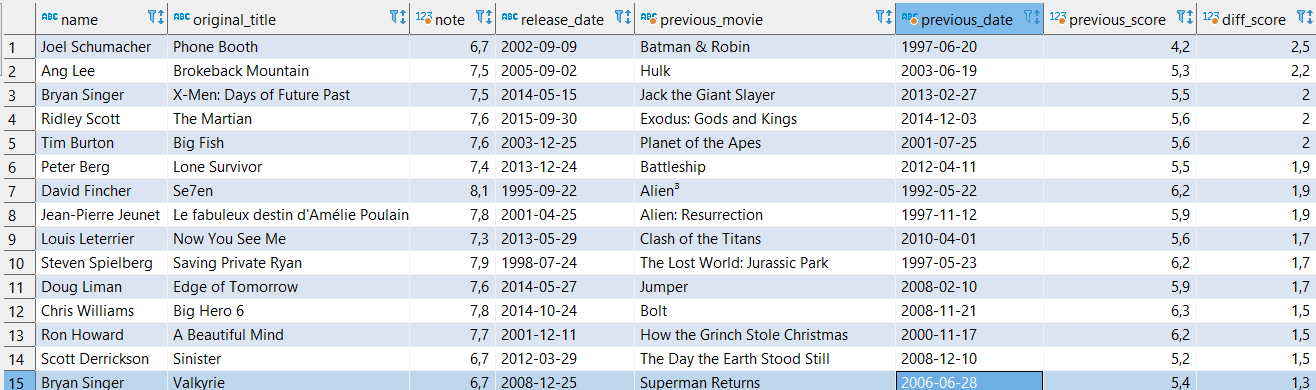

In [ ]:
WITH ranked_movies AS (
    SELECT
        d.name AS realisateur,
        m.title AS titre,
        m.vote_average AS note_moyenne,
        m.release_date AS date_sortie,
        LAG(m.title) OVER(PARTITION BY d.name ORDER BY m.release_date) AS titre_precedent,
        LAG(m.vote_average) OVER(PARTITION BY d.name ORDER BY m.release_date) AS note_moyenne_precedente,
        m.vote_average - LAG(m.vote_average) OVER(PARTITION BY d.name ORDER BY m.release_date) AS progression
    FROM
        directors d
    JOIN
        movies m ON d.id = m.director_id
    WHERE
        m.vote_count > 1000
)
SELECT
    realisateur,
    titre,
    note_moyenne,
    date_sortie,
    titre_precedent,
    note_moyenne_precedente,
    progression
FROM
    ranked_movies
ORDER BY
    progression DESC;


# Buckets

Il est possible de créer des colonnes catégorielles.  
Par exemple, tu peux créer une colonne à partir de plusieurs conditions.Pour ça, tu vas utiliser la clause `CASE`et`WHEN`.  
8. 🤔 Pour chaque film, on aimerait une information supplémentaire (donc une colonne supplémentaire). Tu vas créer plusieurs intervalles:  
`[1$ - 100$, 100$ - 10k$, 10k$ - 100k$, 100k$ - 1M$, 1M$ - 100M$, 100M$ - 250M$, > 250M$]`  
En plus de cette information, tu afficheras pour chaque film: le nom du réalisateur, le titre du film et le budget.

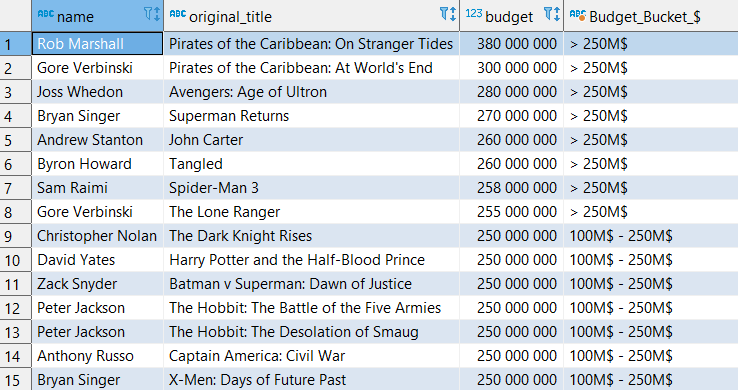

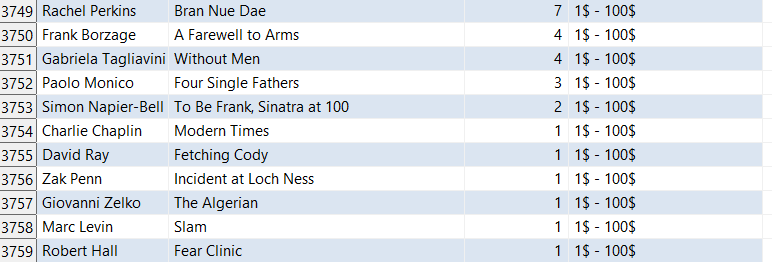

In [ ]:
SELECT
    d.name AS realisateur,
    m.title AS titre,
    m.budget,
    CASE
        WHEN m.budget BETWEEN 1 AND 100 THEN '1$ - 100$'
        WHEN m.budget BETWEEN 101 AND 10000 THEN '100$ - 10k$'
        WHEN m.budget BETWEEN 10001 AND 100000 THEN '10k$ - 100k$'
        WHEN m.budget BETWEEN 100001 AND 1000000 THEN '100k$ - 1M$'
        WHEN m.budget BETWEEN 1000001 AND 100000000 THEN '1M$ - 100M$'
        WHEN m.budget BETWEEN 100000001 AND 250000000 THEN '100M$ - 250M$'
        ELSE '> 250M$'
    END AS intervalle_budget
FROM
    directors d
JOIN
    movies m ON d.id = m.director_id;

# MAX() OVER()

🤔 9. Pour chaque film, le nom du réalisateur(trice), le nom du film, le nombre de votant et le genre.  
Aussi, il faut une colonne qui contient le nombre maximum de votant pour un film dont le réalisateur(trice) appartient au genre masculin ou féminin.

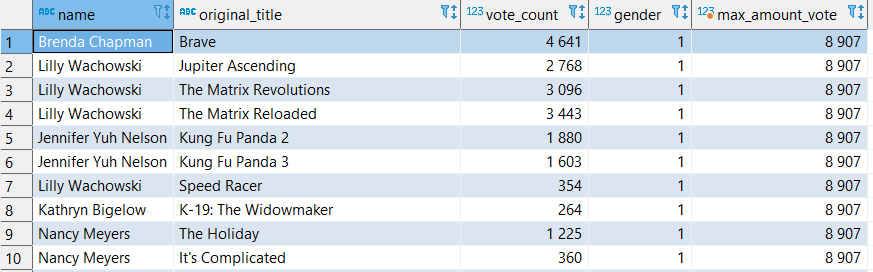

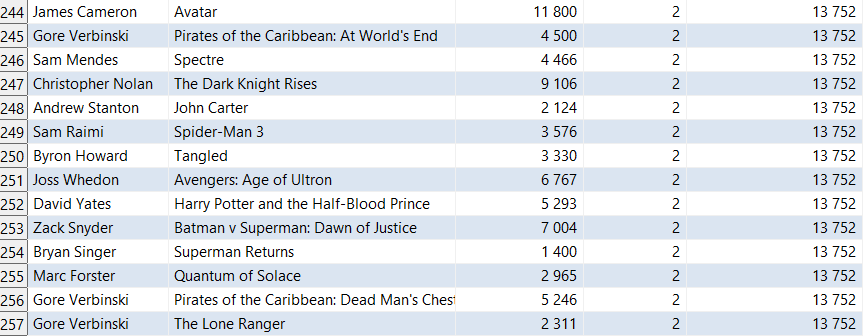

# Buckets + AVG() OVER()

Tu peux reprendre ta requête de la question "Buckets".  
10. 🤔 On aimerait avoir une information supplémentaire.  
On veut savoir quel est le budget moyen pour chaque catégorie de "Bucket_Budget_$"

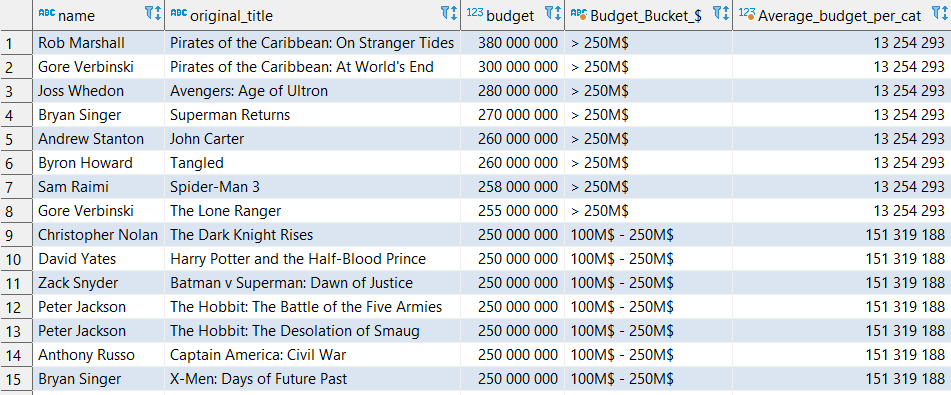

In [ ]:
WITH budget_buckets AS (
    SELECT
        d.name AS realisateur,
        m.title AS titre,
        m.budget,
        CASE
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0 AND 0.2 THEN '0 - 0.2 Percentile'
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.2 AND 0.4 THEN '0.2 - 0.4 Percentile'
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.4 AND 0.6 THEN '0.4 - 0.6 Percentile'
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.6 AND 0.8 THEN '0.6 - 0.8 Percentile'
            ELSE '0.8 - 1 Percentile'
        END AS Budget_Bucket_$
    FROM
        directors d
    JOIN
        movies m ON d.id = m.director_id
)
SELECT
    Budget_Bucket_$,
    AVG(budget) AS budget_moyen
FROM
    budget_buckets
GROUP BY
    Budget_Bucket_$;


# PERCENT_RANK()

Faire des buckets, c'est bien, mais faire des buckets équitablement répartie, dans certains cas c'est encore mieux ! Si tu as été curieux sur le résultat obtenu à la question précédente, `Buckets + AVG() OVER()`, tu as sûrement remarqué qu'un des buckets à beaucoup plus de films que les autres. C'est du au fait que nos conditions étaient purement arbitraire.  
11. 🤔 Pour cette question, on va donc utiliser `PERCENT_RANK` afin de créer des buckets qui auront quasiment le même nombre de films.  
Pour chaque film, on aimerait une information supplémentaire (donc une colonne supplémentaire). Tu vas créer plusieurs buckets:  
`[0 - 0.2 Percentile, 0.2 - 0.4 Percentile, 0.4 - 0.6 Percentile, 0.6 - 0.8 Percentile, 0.8 - 1 Percentile]`  
En plus de cette information, tu afficheras pour chaque film: le nom du réalisateur, le titre du film et le budget.

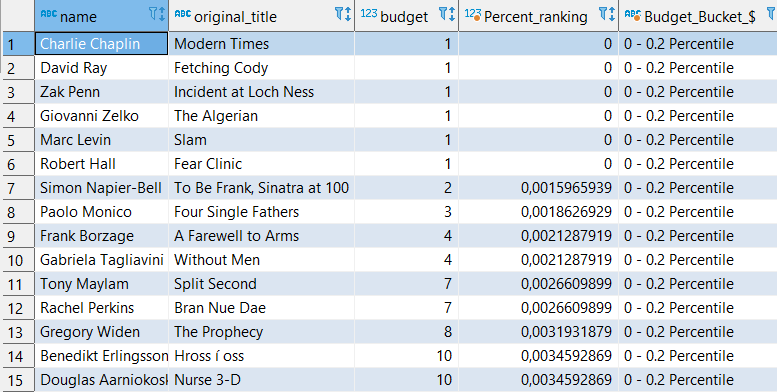

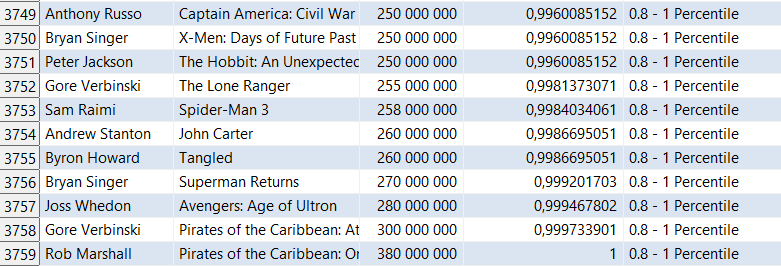

In [ ]:
SELECT
    d.name AS realisateur,
    m.title AS titre,
    m.budget,
    CASE
        WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0 AND 0.2 THEN '0 - 0.2 Percentile'
        WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.2 AND 0.4 THEN '0.2 - 0.4 Percentile'
        WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.4 AND 0.6 THEN '0.4 - 0.6 Percentile'
        WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.6 AND 0.8 THEN '0.6 - 0.8 Percentile'
        ELSE '0.8 - 1 Percentile'
    END AS bucket
FROM
    directors d
JOIN
    movies m ON d.id = m.director_id;

# PERCENT RANK() suite

12. 🤔 Pour le plaisir, on aimerait savoir combien de films il y a par catégorie de la colonne "Budget_Bucket_$".

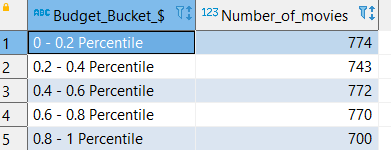

In [ ]:
WITH budget_buckets AS (
    SELECT
        d.name AS realisateur,
        m.title AS titre,
        m.budget,
        CASE
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0 AND 0.2 THEN '0 - 0.2 Percentile'
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.2 AND 0.4 THEN '0.2 - 0.4 Percentile'
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.4 AND 0.6 THEN '0.4 - 0.6 Percentile'
            WHEN PERCENT_RANK() OVER (ORDER BY m.budget) BETWEEN 0.6 AND 0.8 THEN '0.6 - 0.8 Percentile'
            ELSE '0.8 - 1 Percentile'
        END AS Budget_Bucket_$
    FROM
        directors d
    JOIN
        movies m ON d.id = m.director_id
)
SELECT
    Budget_Bucket_$,
    COUNT(*) AS nombre_de_films
FROM
    budget_buckets
GROUP BY
    Budget_Bucket_$;


Question :     
Est-ce qu'une autre idée te vient à l'esprit pour créer des buckets de façon ingénieuse ?

Réponse :

# NTILE()

Une autre possibilité pour créer des Buckets, c'est d'utiliser la fonction NTILE(). Cette fonction, très pratique, te permet de diviser tes données en quantité encore plus équitable que ce que tu as fait à la question précédente.  
13. 🤔 On aimerait avoir ici 5 Buckets, ou chacun des buckets on respectivement `[752, 752, 752, 752, 751]`films.  
Pour chaque bucket, on veut le nombre de films, le plus petit budget de chaque bucket, le plus gros budget de chaque bucket, et enfin le budget moyen pour chaque bucket.

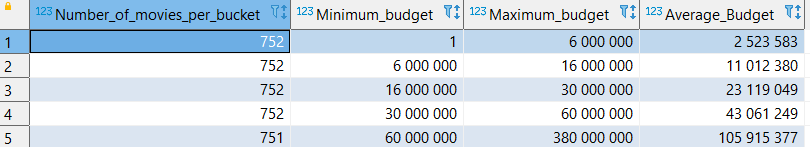

In [ ]:
WITH budget_buckets AS (
    SELECT
        d.name AS realisateur,
        m.title AS titre,
        m.budget,
        NTILE(5) OVER (ORDER BY m.budget) AS Budget_Bucket
    FROM
        directors d
    JOIN
        movies m ON d.id = m.director_id
)
SELECT
    Budget_Bucket,
    COUNT(*) AS nombre_de_films,
    MIN(budget) AS budget_min,
    MAX(budget) AS budget_max,
    AVG(budget) AS budget_moyen
FROM
    budget_buckets
GROUP BY
    Budget_Bucket;
